In [3]:
import geopandas as gpd

gdf = gpd.read_file('/Users/erick/ReGID Dropbox/zDATA/平成22年国勢調査100mメッシュ推計データ/Miyagi_Census.shp')
gdf.head()

,ᰐ쁿䛈b,MeshCode,geometry
0,56405538900,56405538900,"POLYGON ((140.72625 37.77583, 140.72625 37.775..."
1,56405538901,56405538901,"POLYGON ((140.72750 37.77583, 140.72750 37.775..."
2,56405538902,56405538902,"POLYGON ((140.72875 37.77583, 140.72875 37.775..."
3,56405538903,56405538903,"POLYGON ((140.73000 37.77583, 140.73000 37.775..."
4,56405538904,56405538904,"POLYGON ((140.73125 37.77583, 140.73125 37.775..."


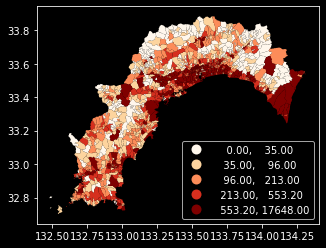

In [1]:
import getPopulation as gp

kochi = gp.getPopulation(39)
# aos='./AOS/StudyArea.shp'
# kochi_small = gp.getPopulationArea(39,aos,4326)
# gp.plotPopulation(kochi)
gp.plotPopulation(kochi,bck=False)



In [4]:
import folium
import geopandas as gpd
gdata=kochi_small
gdata.to_crs(4326, inplace=True)
lonlat = gdata.geometry.total_bounds[0:2]
loc = list([lonlat[1], lonlat[0]])
map = folium.Map(location=loc, tiles='OpenStreetMap', zoom_start=14)
for _, r in gdata.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry'])#.simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    geo_j.add_to(map)
map

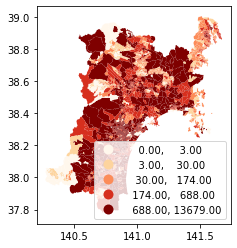

In [25]:
sendai = gp.getPopulation(4)
gp.plotPopulation(sendai)

In [26]:
sendai.TotalPop.sum()

2330424

In [29]:
kochi_small.to_file('kochi_small.shp')


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [32]:
inund = gpd.read_file('./AOS/inund_pol_small.shp')
inund.head()

,Val_GovCod,FigureF,DivRatioF,ConcealF,Reserve1,Reserve2,NoIndicato,TotalPop,Male,Female,NoHousehol,AreaKm2,PopDensity,All_text,Parcel,Id,inund5,geometry
0,39201001000,0,0,0,None,None,6,327,151,176,125,0.045,7266.67,???-???--???-,None,0,-13.557732,"POLYGON ((133.54738 33.56493, 133.54708 33.563..."
1,39201002000,0,0,0,None,None,6,881,416,465,438,0.167,5275.45,???-???--???-,None,0,-4.098166,"POLYGON ((133.56388 33.55663, 133.56398 33.556..."
2,39201012001,0,0,0,None,None,6,618,263,355,234,0.041,15073.17,???-???--???-???,???,0,-0.283146,"POLYGON ((133.53598 33.56543, 133.53588 33.566..."
3,39201012002,0,0,0,None,None,6,636,271,365,344,0.059,10779.66,???-???--???-???,???,0,0.387265,"POLYGON ((133.53628 33.56933, 133.53768 33.569..."
4,39201012003,0,0,0,None,None,6,712,320,392,359,0.084,8476.19,???-???--???-???,???,0,0.534913,"POLYGON ((133.53768 33.56943, 133.53628 33.569..."


In [33]:
inund.TotalPop.sum()

52013